In [1]:
import numpy as np
from BNumMet.LinearSystems import permute
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import lu

In [2]:
def lu1(Matrix):  # LU decomposition with np subarrays
    if Matrix.shape[0] != Matrix.shape[1]:
        raise ValueError("Matrix must be square")

    n = Matrix.shape[0]  # number of rows/columns
    A = Matrix.copy().astype(float)  # Make a copy of A and convert to float
    P = np.eye(n, dtype=float)  # Initialize P as the identity matrix

    # Loop over the columns of A
    for col in range(n):
        # Find the index of the row with the largest pivot element
        iMax = int(np.argmax(np.abs(A[col:, col])) + col)

        # Skip if the pivot is zero
        if A[iMax, col] != 0:
            # Swap the rows of A and P for those with the largest pivot element
            A = permute(A, iMax, col)
            P = permute(P, iMax, col)

            pivot = A[col, col]

            A[col + 1 :, col] = A[col + 1 :, col] / pivot
            A[col + 1 :, col + 1 :] = A[col + 1 :, col + 1 :] - (
                A[col + 1 :, :][:, [col]] @ A[[col], :][:, col + 1 :]
            )  # It is the same as the matrix multiplition (A[col + 1 :, col][:, np.newaxis] @ A[col, col + 1 :][np.newaxis, :]) or np.outer(A[col + 1 :, col], A[col, col + 1 :])

    L = np.tril(A, -1) + np.eye(
        n
    )  # Extract the lower triangular matrix from A and add the identity matrix to make it a proper lower triangular matrix
    U = np.triu(A)  # Extract the upper triangular matrix from A

    return P, L, U


def lu2(Matrix):  # LU decomposition with np newaxis syntax
    if Matrix.shape[0] != Matrix.shape[1]:
        raise ValueError("Matrix must be square")

    n = Matrix.shape[0]  # number of rows/columns
    A = Matrix.copy().astype(float)  # Make a copy of A and convert to float
    P = np.eye(n, dtype=float)  # Initialize P as the identity matrix

    # Loop over the columns of A
    for col in range(n):
        # Find the index of the row with the largest pivot element
        iMax = int(np.argmax(np.abs(A[col:, col])) + col)

        # Skip if the pivot is zero
        if A[iMax, col] != 0:
            # Swap the rows of A and P for those with the largest pivot element
            A = permute(A, iMax, col)
            P = permute(P, iMax, col)

            pivot = A[col, col]

            A[col + 1 :, col] = A[col + 1 :, col] / pivot
            A[col + 1 :, col + 1 :] = (
                A[col + 1 :, col][:, np.newaxis] @ A[col, col + 1 :][np.newaxis, :]
            )  # It is the same as the matrix multiplition (A[col + 1 :, col][:, np.newaxis] @ A[col, col + 1 :][np.newaxis, :]) or np.outer(A[col + 1 :, col], A[col, col + 1 :])

    L = np.tril(A, -1) + np.eye(
        n
    )  # Extract the lower triangular matrix from A and add the identity matrix to make it a proper lower triangular matrix
    U = np.triu(A)  # Extract the upper triangular matrix from A

    return P, L, U


def lu3(Matrix):  # LU decomposition with np outer syntax
    if Matrix.shape[0] != Matrix.shape[1]:
        raise ValueError("Matrix must be square")

    n = Matrix.shape[0]  # number of rows/columns
    A = Matrix.copy().astype(float)  # Make a copy of A and convert to float
    P = np.eye(n, dtype=float)  # Initialize P as the identity matrix

    # Loop over the columns of A
    for col in range(n):
        # Find the index of the row with the largest pivot element
        iMax = int(np.argmax(np.abs(A[col:, col])) + col)

        # Skip if the pivot is zero
        if A[iMax, col] != 0:
            # Swap the rows of A and P for those with the largest pivot element
            A = permute(A, iMax, col)
            P = permute(P, iMax, col)

            pivot = A[col, col]

            A[col + 1 :, col] = A[col + 1 :, col] / pivot
            A[col + 1 :, col + 1 :] = np.outer(
                A[col + 1 :, col], A[col, col + 1 :]
            )  # It is the same as the matrix multiplition (A[col + 1 :, col][:, np.newaxis] @ A[col, col + 1 :][np.newaxis, :]) or np.outer(A[col + 1 :, col], A[col, col + 1 :])

    L = np.tril(A, -1) + np.eye(
        n
    )  # Extract the lower triangular matrix from A and add the identity matrix to make it a proper lower triangular matrix
    U = np.triu(A)  # Extract the upper triangular matrix from A

    return P, L, U


def lu4(Matrix):  # LU decomposition with for loops
    if Matrix.shape[0] != Matrix.shape[1]:
        raise ValueError("Matrix must be square")

    n = Matrix.shape[0]  # number of rows/columns
    A = Matrix.copy().astype(float)  # Make a copy of A and convert to float
    P = np.eye(n).astype(float)  # Initialize P as the identity matrix

    # Loop over the columns of A
    for col in range(n):
        # Find the index of the row with the largest pivot element
        iMax = int(np.argmax(np.abs(A[col:, col])) + col)

        # Skip if the pivot is zero
        if A[iMax, col] != 0:
            # Swap the rows of A and P for those with the largest pivot element
            A = permute(A, iMax, col)
            P = permute(P, iMax, col)

            # Gaussian elimination
            for row in range(col + 1, n):
                A[row, col] = (
                    A[row, col] / A[col, col]
                )  # Calculate the multiplier and store in A for later use
                A[row, col + 1 :] = (
                    A[row, col + 1 :] - A[row, col] * A[col, col + 1 :]
                )  # Update the remaining elements in the row using the multiplier

    L = np.tril(A, -1) + np.eye(
        n
    )  # Extract the lower triangular matrix from A and add the identity matrix to make it a proper lower triangular matrix
    U = np.triu(A)  # Extract the upper triangular matrix from A

    return P, L, U

In [3]:
functions = [
    (lu1, "Submatrices"),
    (lu2, "NewAxis"),
    (lu3, "Outer"),
    (lu4, "ForLoops"),
    (lu, "Scipy"),
]
sizes = [2**i for i in range(2, 14)]
results = []
for size in sizes:
    print(f"{size:_^50}")
    A = np.random.rand(size, size)
    for func, name in functions:

        start = time.time()
        func(A)
        end = time.time()
        results.append((name, size, end - start))
        print(f"\t {name} - {end - start:.3f}")

________________________4_________________________
	 Submatrices - 0.001
	 NewAxis - 0.000
	 Outer - 0.000
	 ForLoops - 0.000
	 Scipy - 0.001
________________________8_________________________
	 Submatrices - 0.000
	 NewAxis - 0.000
	 Outer - 0.000
	 ForLoops - 0.000
	 Scipy - 0.001
________________________16________________________
	 Submatrices - 0.000
	 NewAxis - 0.001
	 Outer - 0.000
	 ForLoops - 0.001
	 Scipy - 0.001
________________________32________________________
	 Submatrices - 0.001
	 NewAxis - 0.002
	 Outer - 0.001
	 ForLoops - 0.004
	 Scipy - 0.000
________________________64________________________
	 Submatrices - 0.003
	 NewAxis - 0.003
	 Outer - 0.003
	 ForLoops - 0.011
	 Scipy - 0.000
_______________________128________________________
	 Submatrices - 0.009
	 NewAxis - 0.006
	 Outer - 0.005
	 ForLoops - 0.028
	 Scipy - 0.162
_______________________256________________________
	 Submatrices - 0.035
	 NewAxis - 0.027
	 Outer - 0.016
	 ForLoops - 0.133
	 Scipy - 0.393
______

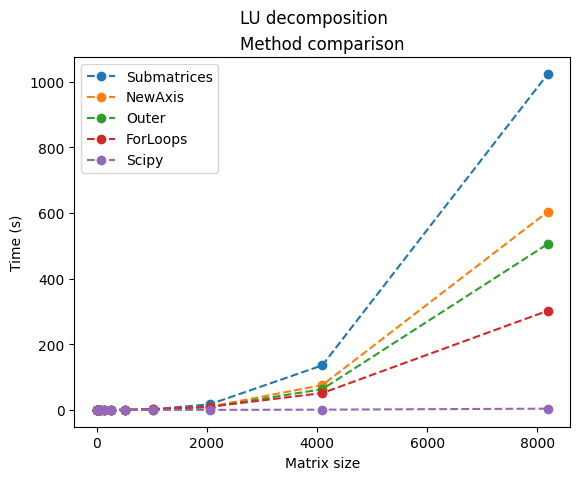

In [7]:
import matplotlib.pyplot as plt

for fun in functions:

    plt.plot(
        [i[1] for i in results if i[0] == fun[1]],
        [i[2] for i in results if i[0] == fun[1]],
        "o--",
        label=fun[1],
    )
    plt.loglog(
        [i[1] for i in results if i[0] == fun[1]],
        [i[2] for i in results if i[0] == fun[1]],
        "o--",
        label=fun[1],
    )

plt.legend()
plt.xlabel("Matrix size")
plt.ylabel("Time (s)")
plt.suptitle("LU decomposition")
plt.title("Method comparison")
plt.show()

SCIPY : https://netlib.org/lapack/explore-html/dd/d9a/group__double_g_ecomputational_ga0019443faea08275ca60a734d0593e60.html 

Uses internal LAPACK routines to solve a system of linear equations with a square coefficient matrix. https://epubs.siam.org/doi/10.1137/S0895479896297744 Sivan Toledo, 1996
